In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import requests
import json
from datetime import datetime

In [4]:
# Reading the final dataset NYbike_trips_Q3.csv

filepath = '/Users/vineetasinha/Documents/workspace/NYCitiBike/NYbike_trips_Q1.csv'
df_NYTrips_Q1 = pd.read_csv(filepath)


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_3581/3861110912.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NYTrips_Q1 = pd.read_csv(filepath)


Cleaning the dataset

In [6]:
print(df_NYTrips_Q1.duplicated())

0          False
1          False
2          False
3          False
4          False
           ...  
6328617    False
6328618    False
6328619    False
6328620    False
6328621    False
Length: 6328622, dtype: bool


In [8]:
df_NYTrips_Q1.shape


(6328622, 16)

In [10]:
# Count missing values per column
missing_values_count = df_NYTrips_Q1.isnull().sum()

# Display count of missing values
print("Missing values count per column:")
print(missing_values_count)


Missing values count per column:
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        8
start_station_id          8
end_station_name      15614
end_station_id        15614
start_lat                 0
start_lng                 0
end_lat               11591
end_lng               11591
member_casual             0
Date                      0
AvgTemp                 627
_merge                    0
dtype: int64


In [12]:
# Cleaning the missing values
df_cleaned_q1 = df_NYTrips_Q1.dropna(subset=['AvgTemp'])


In [14]:
missing_values_count = df_cleaned_q1.isnull().sum()

# Display count of missing values
print("Missing values count per column:")
print(missing_values_count)


Missing values count per column:
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        8
start_station_id          8
end_station_name      15406
end_station_id        15406
start_lat                 0
start_lng                 0
end_lat               11422
end_lng               11422
member_casual             0
Date                      0
AvgTemp                   0
_merge                    0
dtype: int64


In [16]:
df_cleaned_q1.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date,AvgTemp,_merge
0,70F3BA79664016C1,classic_bike,2022-02-28 09:22:49.821,2022-02-28 09:28:55.174,9 Ave & W 18 St,6190.08,Greenwich Ave & Charles St,5914.08,40.743174,-74.003664,40.735238,-74.000271,member,2022-02-28,0.8,both
1,8FA3412A958122D0,electric_bike,2022-02-14 10:47:30.462,2022-02-14 10:56:04.433,W 120 St & Claremont Ave,7745.07,Frederick Douglass Blvd & W 117 St,7688.12,40.810949,-73.963400,40.805159,-73.954692,member,2022-02-14,-4.3,both
2,0E2BA02AEAD03EB8,electric_bike,2022-02-18 22:26:55.796,2022-02-18 22:44:31.472,E 4 St & 2 Ave,5593.04,Greenwich Ave & Charles St,5914.08,40.726281,-73.989780,40.735238,-74.000271,member,2022-02-18,9.9,both
3,B626F8E1D7ABABBA,classic_bike,2022-02-09 18:38:18.621,2022-02-09 18:47:11.274,White St & Johnson Ave,5099.03,Irving Ave & Harman St,4856.05,40.707174,-73.935810,40.701080,-73.917900,member,2022-02-09,2.8,both
4,605E7CC493D08F3B,electric_bike,2022-02-06 14:52:48.564,2022-02-06 14:55:56.218,S Portland Ave & Hanson Pl,4354.05,Nevins St & Schermerhorn St,4437.09,40.685396,-73.974315,40.687372,-73.981761,member,2022-02-06,-4.8,both


In [18]:
# converting the 'Date' column in the df_NYTrips_Q1 DataFrame to a datetime format. It includes an additional parameter errors='coerce', which handles any errors that may arise during the conversion.
df_cleaned_q1['Date'] = pd.to_datetime(df_cleaned_q1['Date'], errors='coerce')


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_3581/562493325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_q1['Date'] = pd.to_datetime(df_cleaned_q1['Date'], errors='coerce')


In [20]:
# creating a new DataFrame named daily_trips_q1 that contains the count of bike trips per day for the second quarter (Q2).
daily_trips_q1 = pd.DataFrame(df_cleaned_q1.groupby(['Date'])['ride_id'].count()).reset_index()

In [22]:
# rename a column in the daily_trips_q2 from ride_id to bike_rides_daily
daily_trips_q1.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

# merging two DataFrames (df_NYTrips_Q2 and daily_trips_q2) on a common column, 'Date', while renaming a column from daily_trips_q1 in the process. The merge is performed using an outer join, and an additional column called 'merge_indicator' is added to indicate the source of each row.
df_2022_Q1 = df_cleaned_q1.merge(daily_trips_q1.rename(columns = {'trip_id':'bike_rides_daily'}), on = 'Date', how = 'outer', indicator = 'merge_indicator')


In [24]:
print(df_2022_Q1['_merge'].value_counts(dropna = False))


_merge
both    6327995
Name: count, dtype: int64


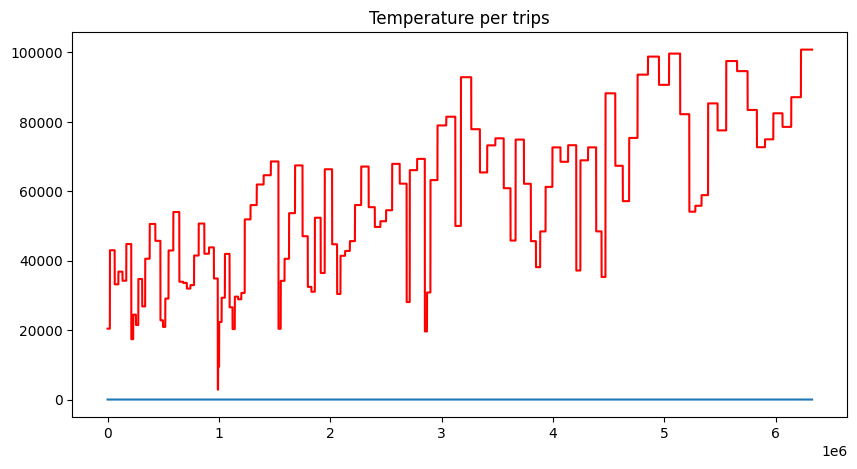

In [26]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_2022_Q1['AvgTemp'])
plt.plot(df_2022_Q1['bike_rides_daily'], color = 'red')
plt.show()

In [28]:
# inspecting the type of data stored in each column of df_2022_Q2.
df_2022_Q1.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
Date                  datetime64[ns]
AvgTemp                      float64
_merge                        object
bike_rides_daily               int64
merge_indicator             category
dtype: object

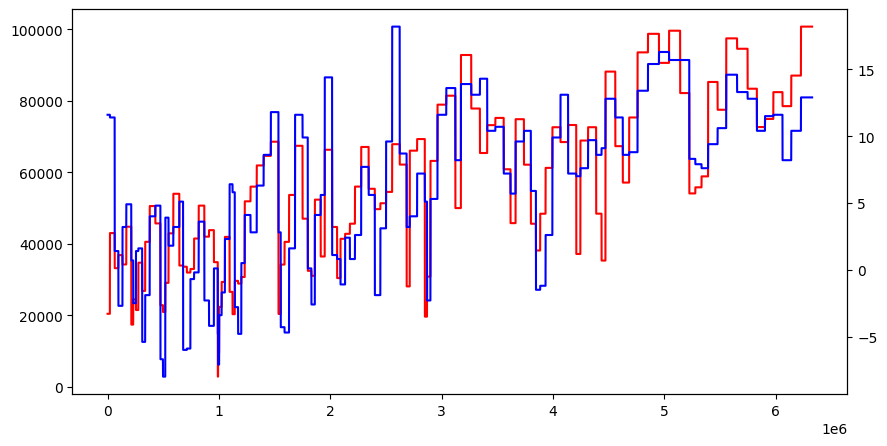

In [30]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df_2022_Q1['bike_rides_daily'],color = "red")
ax2 = ax.twinx()
ax2.plot(df_2022_Q1["AvgTemp"], color = "blue")
plt.show()


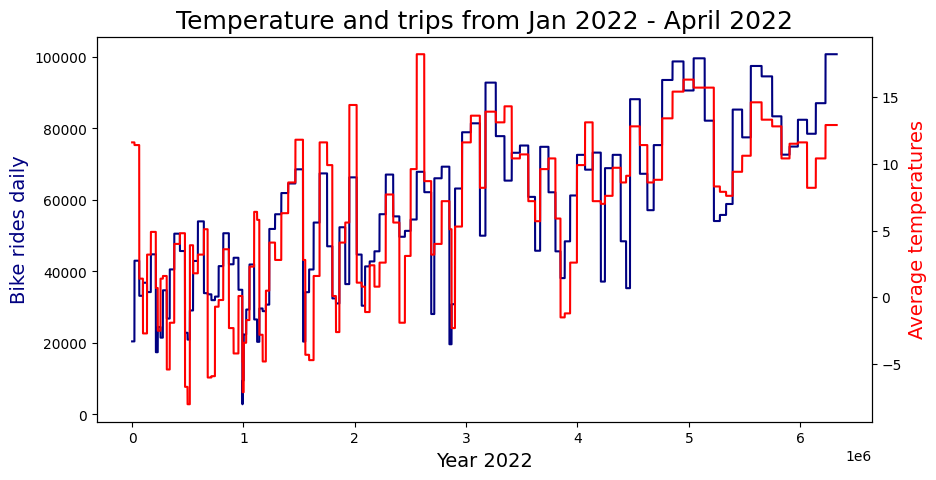

In [32]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_2022_Q1['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_2022_Q1['AvgTemp'], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips from Jan 2022 - April 2022', fontsize = 18)
plt.show()

To create a dual axis chart I used the object-oriented paradigm. I started by creating a figure and two axes objects using plt.subplots(). The two axes objects are necessary to plot on two different y-axes. I used the ax.plot() method to plot the trip counts against the date (or time). Next I used the ax1.twinx() method to create a second y-axis sharing the same x-axis. Then I used the ax2.plot() method to plot temperatures on the second y-axis.Finally I added titles & displayed the plot using plt.show().


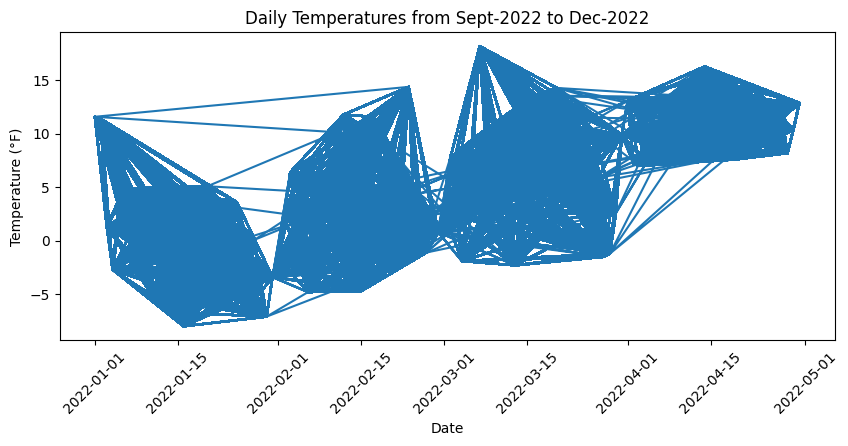

In [35]:
# filtering the df_NYTrips_Q1 DataFrame to create a subset (df_jan_2022) containing only the rows where the 'Date' column falls between January 1, 2022, and April 30, 2022.
df_Q1_2022 = df_cleaned_q1[(df_cleaned_q1['Date'] >= '2022-01-01') & (df_cleaned_q1['Date'] <= '2022-04-30')]

df_Q1_2022 = df_Q1_2022.set_index('Date')

# adjust the rendering settings for plots in Matplotlib when dealing with large datasets.
mpl.rcParams['agg.path.chunksize'] = 100000

# Optionally adjust the path.simplify_threshold 
mpl.rcParams['path.simplify_threshold'] = 1.0  

# Plot Average Temparature for the first quarter of 2022
plt.figure(figsize=(10,4))
plt.title('Daily Temperatures from Jan-2022 to April-2022')
plt.plot(df_Q1_2022 ['AvgTemp'])
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.ylabel('Temperature (°F)')
plt.show()




Bonus Task ----

/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_3581/4263996352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_q1['Date'] = pd.to_datetime(df_cleaned_q1['Date'])


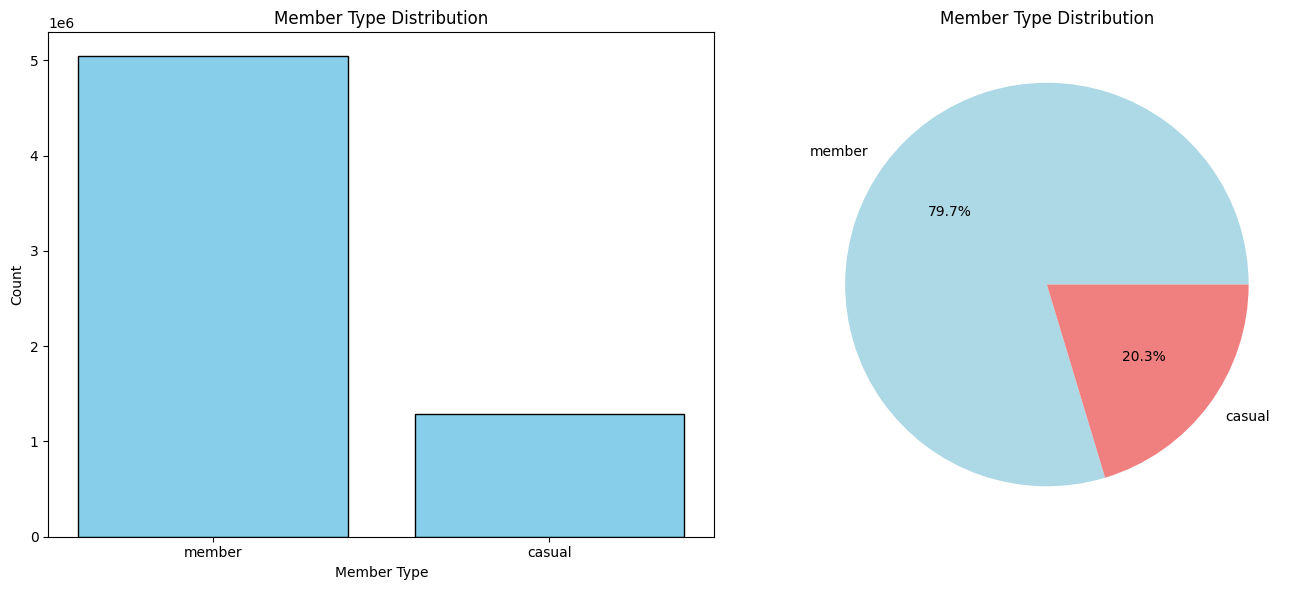

In [39]:
# # Convert 'Date' to datetime if needed
df_cleaned_q1['Date'] = pd.to_datetime(df_cleaned_q1['Date'])

# Calculate counts for 'member_casual'
member_casual_counts = df_cleaned_q1['member_casual'].value_counts()

# Create a figure with two subplots (axes)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot bar chart for 'member_casual' on the first axis
ax[0].bar(member_casual_counts.index, member_casual_counts.values, color='skyblue', edgecolor='black')
ax[0].set_title('Member Type Distribution')
ax[0].set_xlabel('Member Type')
ax[0].set_ylabel('Count')

# Plot pie chart for 'member_casual' on the second axis
ax[1].pie(member_casual_counts, labels=member_casual_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
ax[1].set_title('Member Type Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
df_cleaned_q1.to_csv('/Users/vineetasinha/Documents/workspace/NYCitiBike/CleanedBikeTrips_Q1.csv', index=False)
